# Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll investigate using scikit-learn with regularization in order to produce better models.

## Objectives

- Compare the different inputs with logistic regression models and determine the optimal model 

In [1]:
# Import the necessary packages
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model building and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report

# Regularization techniques
from sklearn.preprocessing import StandardScaler


## Import the data

Import the dataset stored in `'heart.csv'`.

In [3]:
# Import the data

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


## Split the data

Define `X` and `y` where the latter is the `target` variable. This time, follow best practices and also implement a standard train-test split. Assign 25% to the test set and set the `random_state` to 17. 

In [5]:
# Define X and y
# Load the dataset
df = pd.read_csv('heart.csv')

# Define the target variable y and the feature matrix X
y = df['target']
X = df.drop('target', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

# Print the value counts of the target variable in the training and test sets
print(y_train.value_counts(), '\n\n', y_test.value_counts())


target
1    130
0     97
Name: count, dtype: int64 

 target
0    41
1    35
Name: count, dtype: int64


## Initial Model - scikit-learn

Use scikit-learn to build the logistic regression model.

Turn off the intercept and set the regularization parameter, `C`, to a ridiculously large number such as 1e16. 

In [6]:
# Your code here
# Import necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the logistic regression model with no intercept and a large regularization parameter
logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8289473684210527
Confusion Matrix:
 [[32  9]
 [ 4 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.78      0.89      0.83        35

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



## Create an ROC Curve for the scikit-learn model

Use both the training and test sets.

Train AUC: 0.9297383029341793
Test AUC: 0.8975609756097561


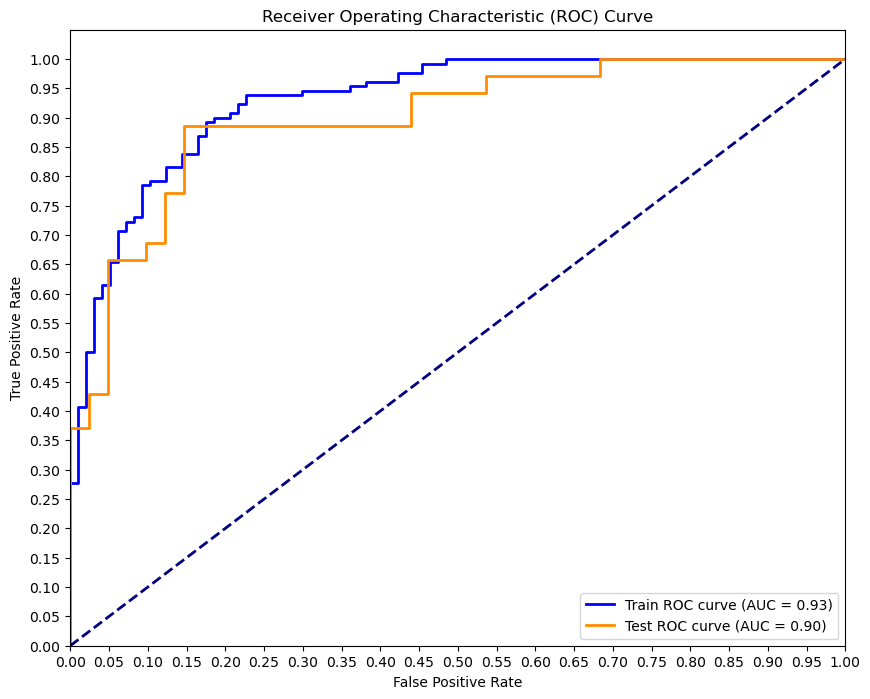

In [7]:
# Your code here

# Import necessary packages
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probability scores for the training and test sets
y_train_score = logreg.predict_proba(X_train)[:, 1]
y_test_score = logreg.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC for the training set
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
train_auc = auc(train_fpr, train_tpr)

# Compute the ROC curve and AUC for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
test_auc = auc(test_fpr, test_tpr)

# Print the AUC values
print('Train AUC: {}'.format(train_auc))
print('Test AUC: {}'.format(test_auc))

# Plot the ROC curves
plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC curve (AUC = %0.2f)' % train_auc)
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC curve (AUC = %0.2f)' % test_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Add an Intercept

Now add an intercept to the scikit-learn model. Keep the regularization parameter `C` set to a very large number such as 1e16. 

In [8]:
# Import necessary packages
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model with intercept and a large regularization parameter
logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')

# Fit the model to the training data
logregi.fit(X_train, y_train)

LogisticRegression(C=1e+16, solver='liblinear')

Generate predictions for the training and test sets.

In [9]:
# Generate predictions for the training and test sets
y_hat_train = logregi.predict(X_train)
y_hat_test = logregi.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)
conf_matrix_train = confusion_matrix(y_train, y_hat_train)
conf_matrix_test = confusion_matrix(y_test, y_hat_test)
class_report_train = classification_report(y_train, y_hat_train)
class_report_test = classification_report(y_test, y_hat_test)

# Print the evaluation metrics
print("Training Accuracy:", accuracy_train)
print("Training Confusion Matrix:\n", conf_matrix_train)
print("Training Classification Report:\n", class_report_train)

print("\nTest Accuracy:", accuracy_test)
print("Test Confusion Matrix:\n", conf_matrix_test)
print("Test Classification Report:\n", class_report_test)

Training Accuracy: 0.8546255506607929
Training Confusion Matrix:
 [[ 74  23]
 [ 10 120]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82        97
           1       0.84      0.92      0.88       130

    accuracy                           0.85       227
   macro avg       0.86      0.84      0.85       227
weighted avg       0.86      0.85      0.85       227


Test Accuracy: 0.8289473684210527
Test Confusion Matrix:
 [[32  9]
 [ 4 31]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.78      0.89      0.83        35

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



Plot all three models ROC curves on the same graph.

In [ ]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = None
y_train_score = None

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (`C`) parameters. For each, plot the ROC curve of the training and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and training AUC as you go along.

In [ ]:
# Your code here

How did the regularization parameter impact the ROC curves plotted above? 

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.